In [1]:
import cv2
cv2.__version__

'4.9.0'

In [2]:
# !pip install import-ipynb

In [3]:
# import helper class
%run helper.ipynb

In [4]:
# import pipeline class
%run pipeline.ipynb

### Lane Detection Pipeline:

    1. Convert original image to grayscale.
    2. Darkened the grayscale image (this help in reducing contrast from discoloured regions of road)
    3. Convert original image to HLS colour space.
    4. Isolate yellow from HLS to get yellow mask. ( for yellow lane markings)
    5. Isolate white from HLS to get white mask. (for white lane markings)
    6. Bit-wise OR yellow and white masks to get common mask.
    7. Bit-wise AND mask with darkened image .
    8. Apply slight Gaussian Blur.
    9. Apply canny Edge Detector (adjust the thresholds — trial and error) to get edges.
    10.Define Region of Interest. This helps in weeding out unwanted edges detected by canny edge detector.
    11.Retrieve Hough lines.
    12.Consolidate and extrapolate the Hough lines and draw them on original image.

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mimg
# import helper
import os
# from pipeline import *

%matplotlib inline
%reload_ext autoreload
%autoreload 2

### Read an Image

Stats of an image: <class 'numpy.ndarray'> dimension: (540, 960, 3)


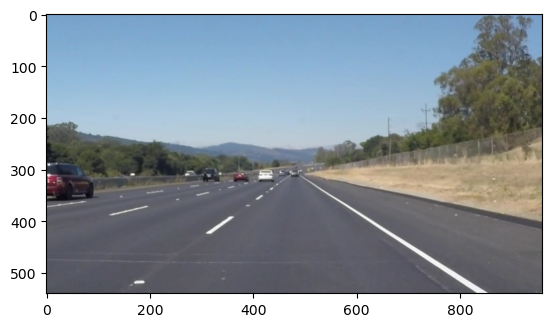

In [6]:
image= mimg.imread(r"C:\Users\varsha\Pictures\CV_IMG\LaneDetection_testImg\solidWhiteRight.jpg")

#print stats and dime of an image
print("Stats of an image:",type(image),"dimension:",image.shape)
plt.imshow(image)

### Ideas for Lane Detection

### Test Images

Build the pipeline to test the images from the test file

In [7]:
PATH= (r"C:\Users\varsha\Pictures\CV_IMG\LaneDetection_testImg")
test_imgs= os.listdir(PATH)

test_imgs

['solidWhiteCurve.jpg',
 'solidWhiteRight.jpg',
 'solidYellowCurve.jpg',
 'solidYellowCurve2.jpg',
 'solidYellowLeft.jpg',
 'whiteCarLaneSwitch.jpg']

## Build a Lane Finding Pipeline

Build the pipeline and run your solution on all test_images. Make copies into the test_images_output directory, and you can use the images in your writeup report.

Try tuning the various parameters, especially the low and high Canny thresholds as well as the Hough lines parameters.


### Step 1: Color Selection

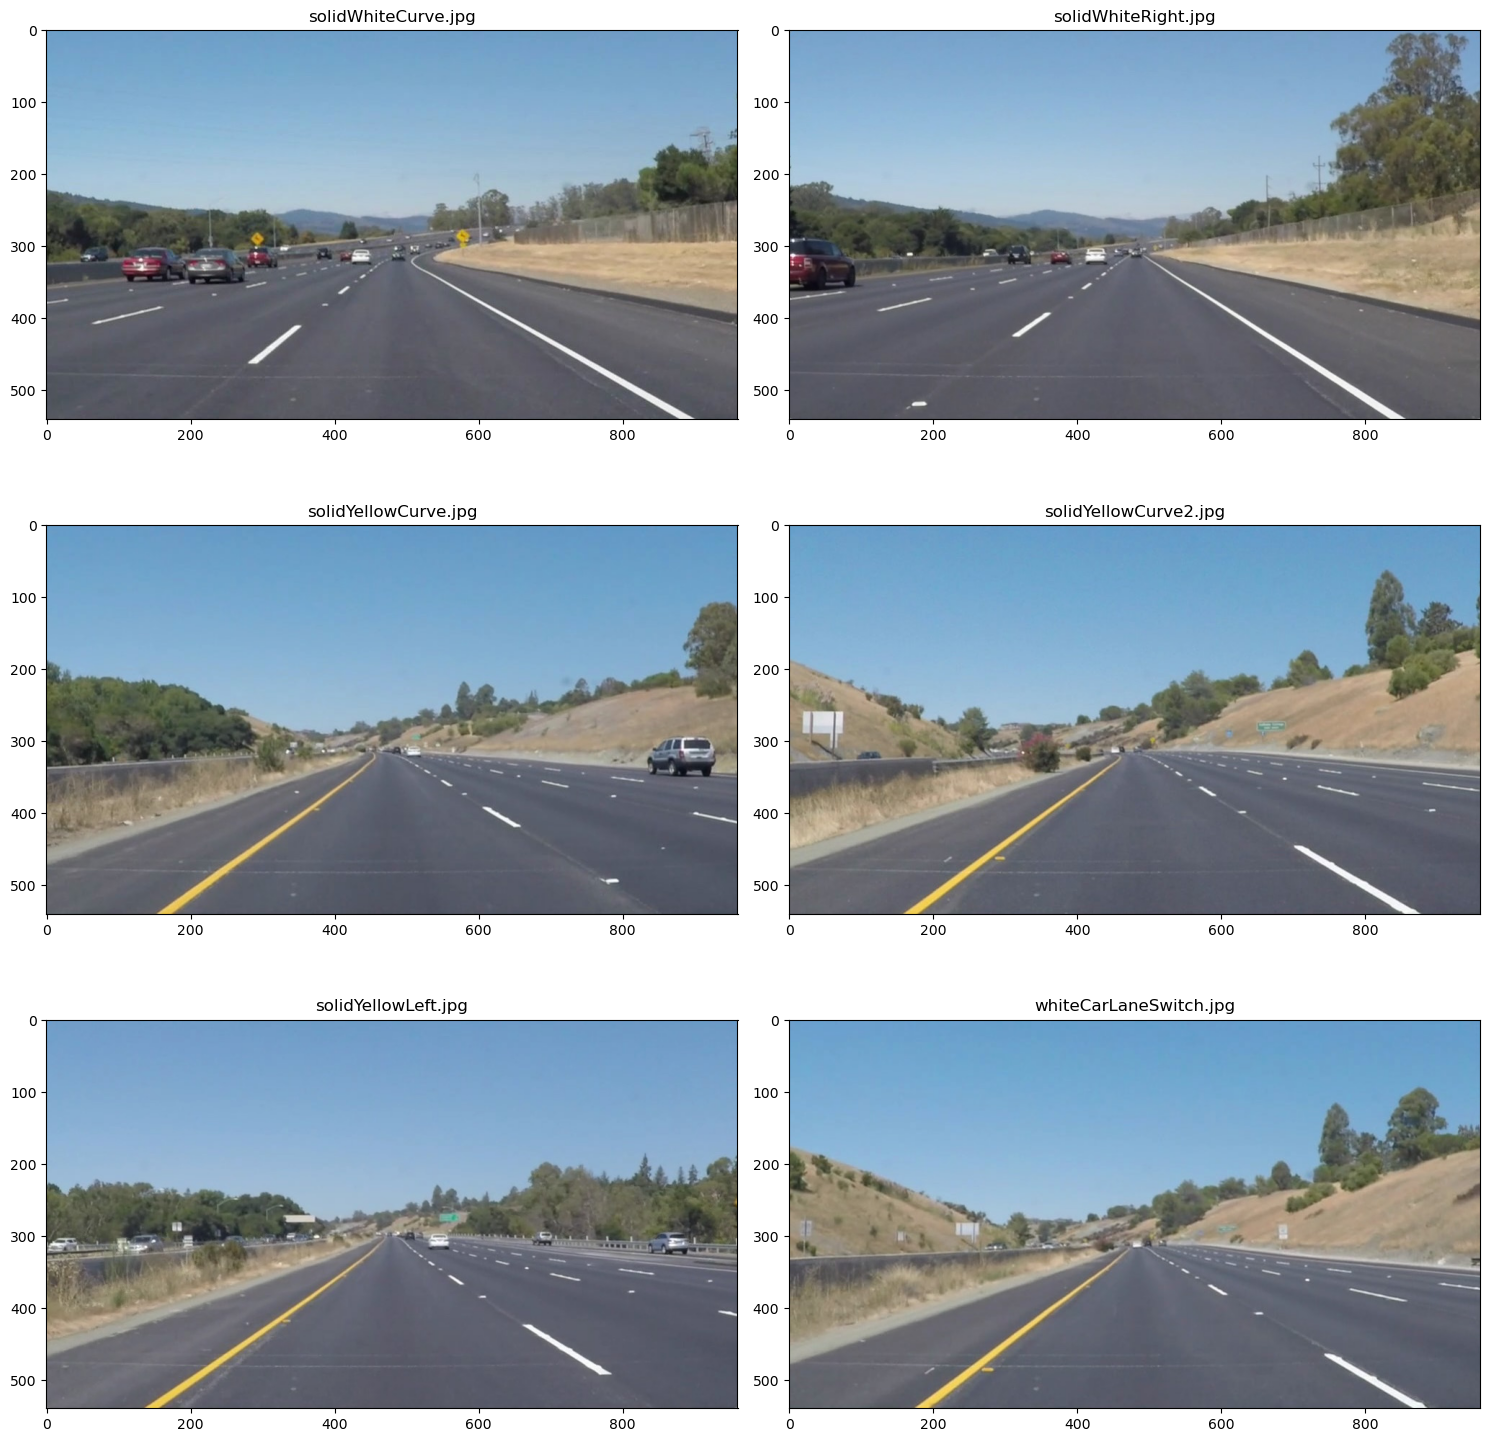

In [8]:
img_list= [read_img(PATH+'/'+name) for name in test_imgs]
display_Imgs(img_list, test_imgs)
# display_Imgs(img_list, test_imgs)
save_Image(img_list, test_imgs, prefix='Original')

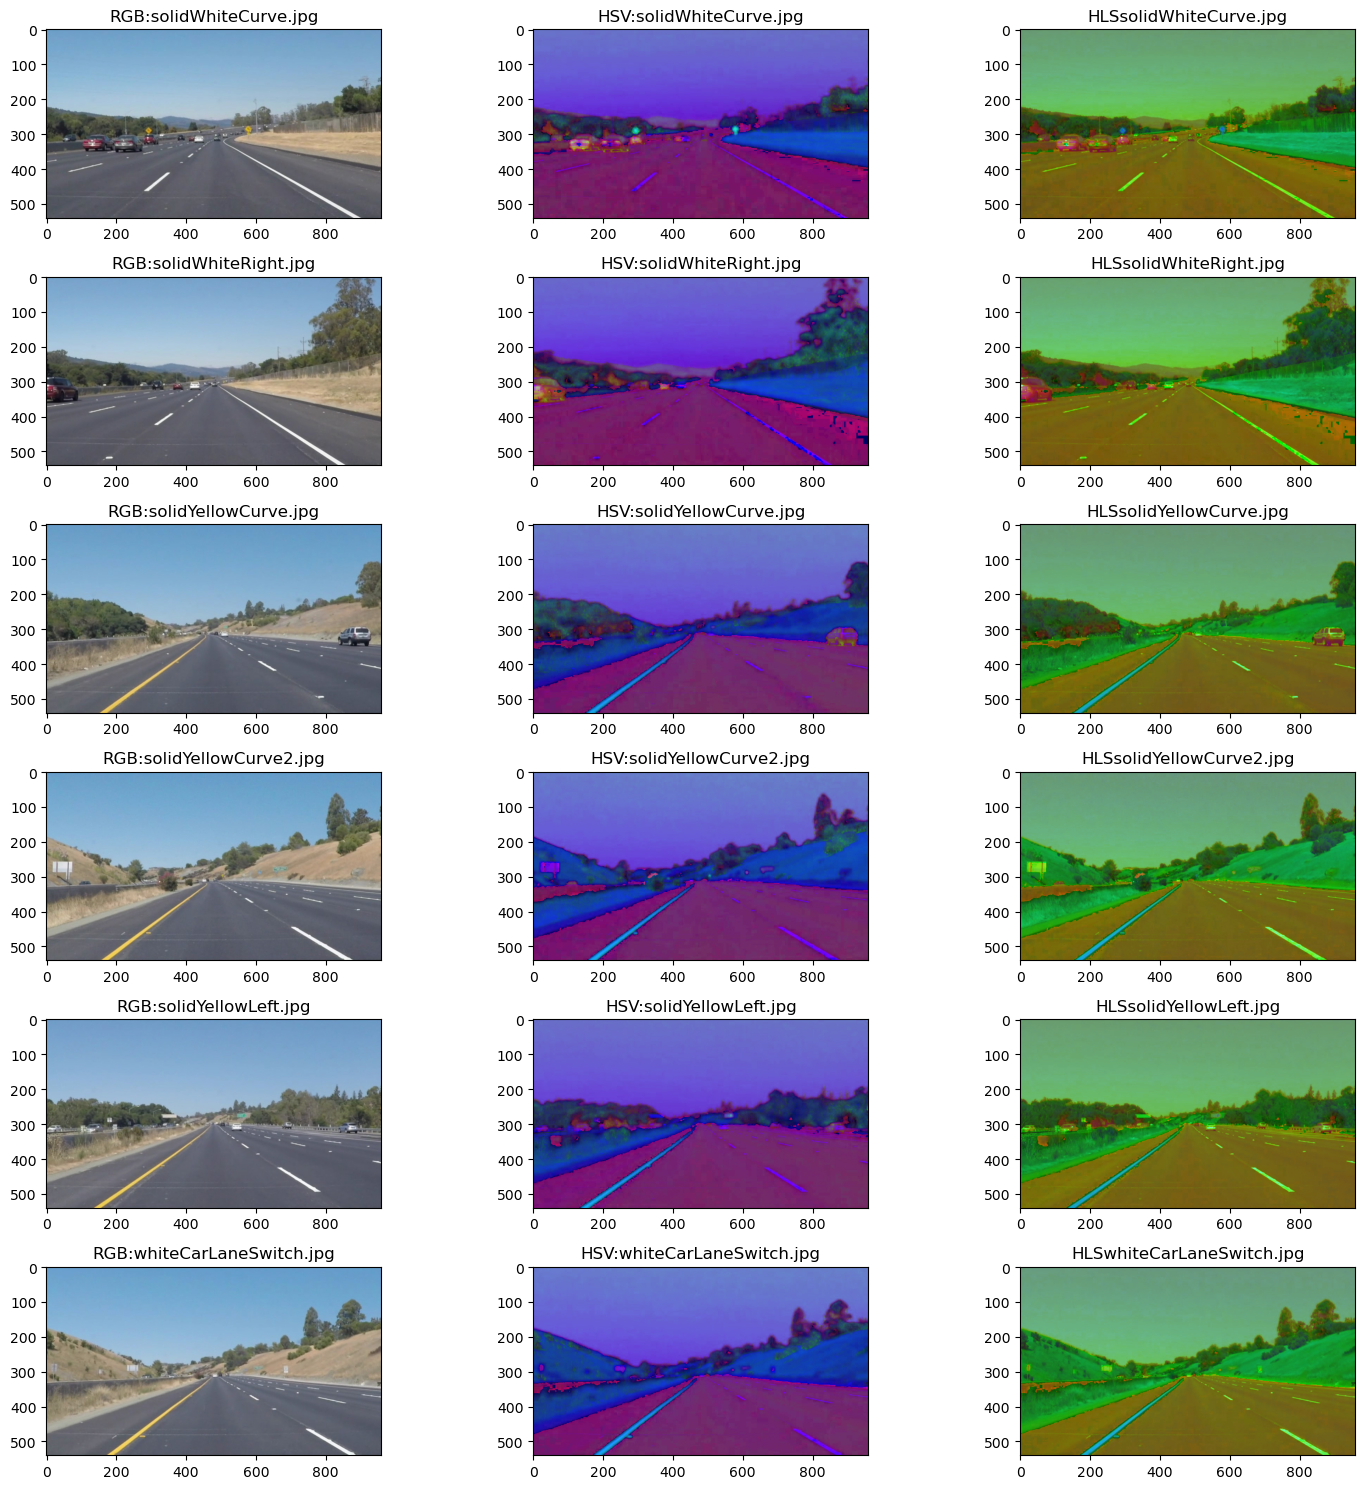

In [9]:
diff_color_space_img= []
diff_color_space_labels= []

for i in range(len(img_list)):
    diff_color_space_img.append(img_list[i])
    diff_color_space_labels.append("RGB:"+test_imgs[i])
    diff_color_space_img.append(to_HSV(img_list[i]))
    diff_color_space_labels.append("HSV:"+test_imgs[i])
    diff_color_space_img.append(to_HLS(img_list[i]))
    diff_color_space_labels.append("HLS"+test_imgs[i])
    
display_Imgs(diff_color_space_img, diff_color_space_labels, cols= 3)

In [10]:
original_img= np.copy(img_list)

### Make Original Image Gray

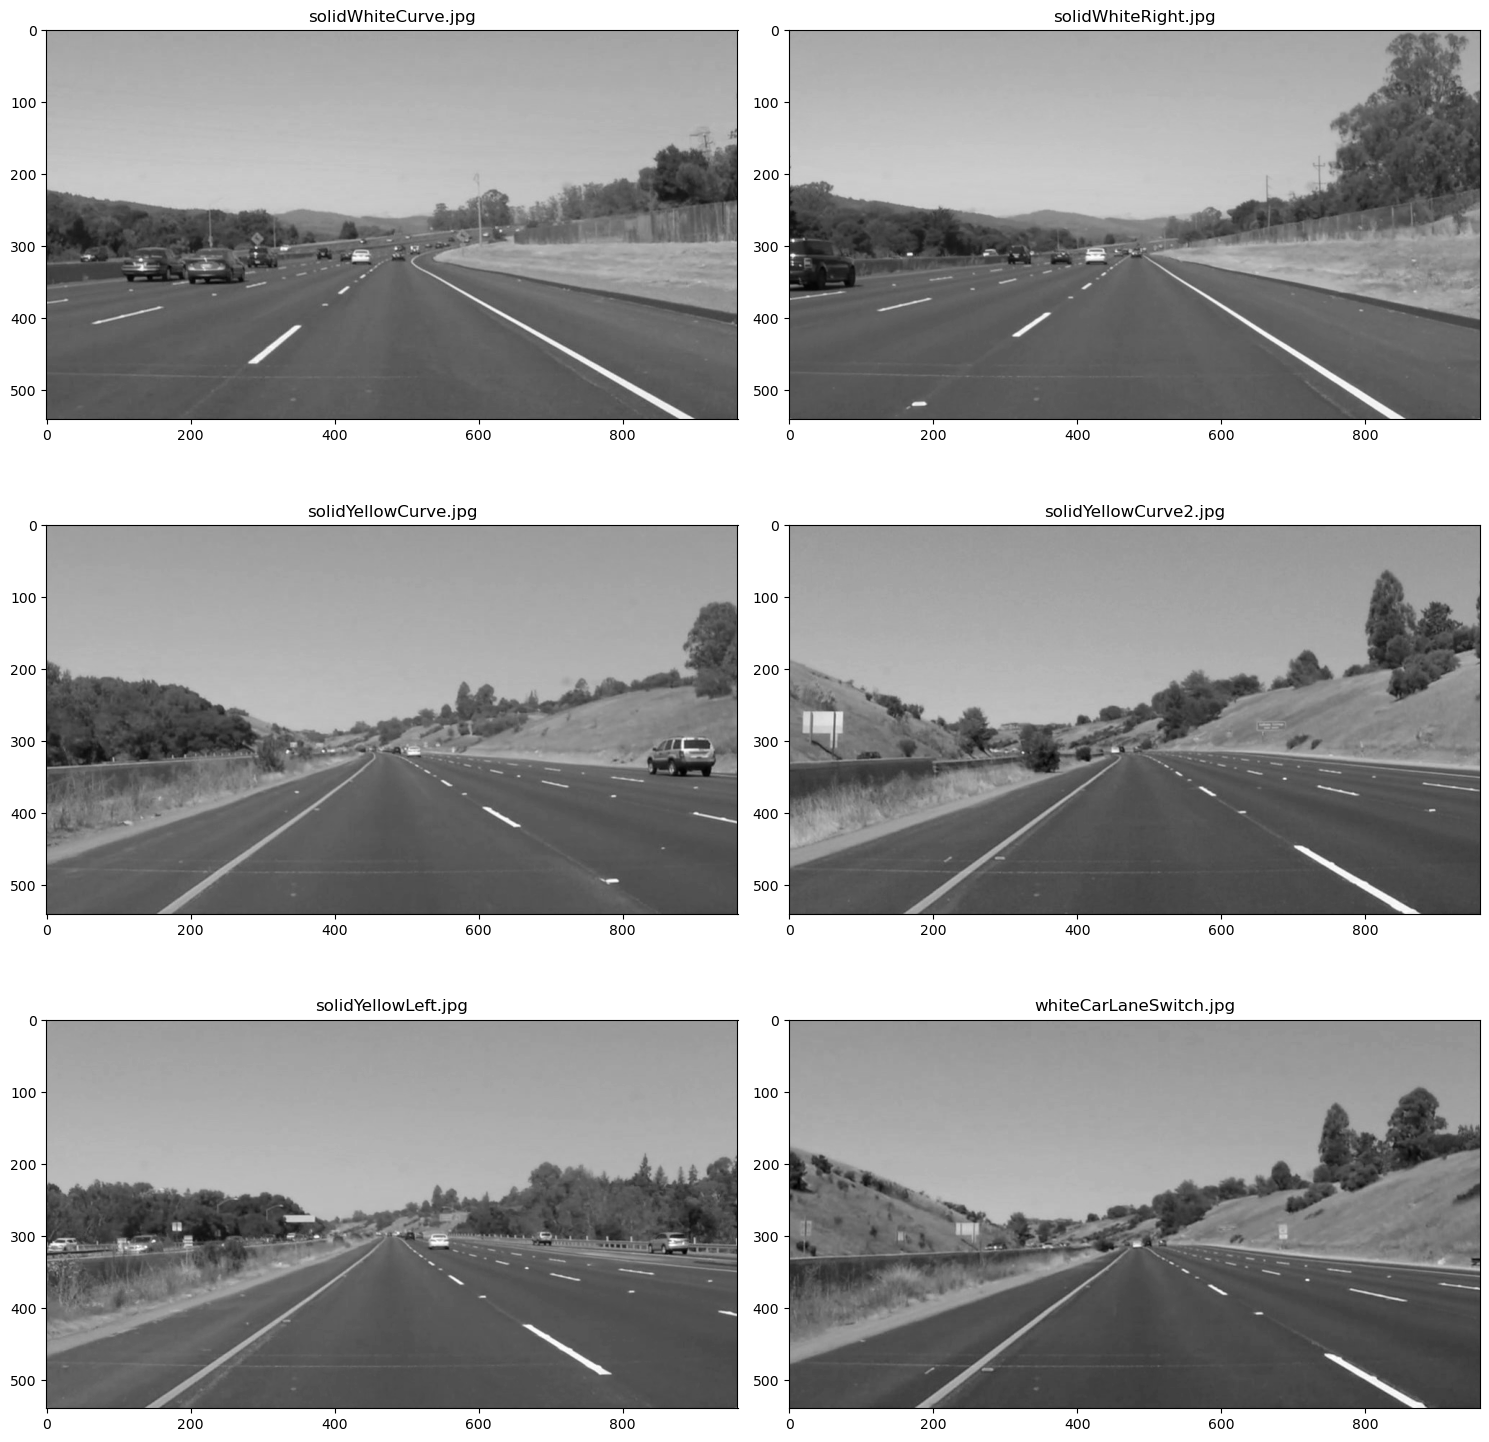

In [11]:
gray_img= [gray_scale(i) for i in img_list]
display_Imgs(gray_img, test_imgs)
# save_Image(gray_img, test_imgs, prefix="Gray")

### Darker Image

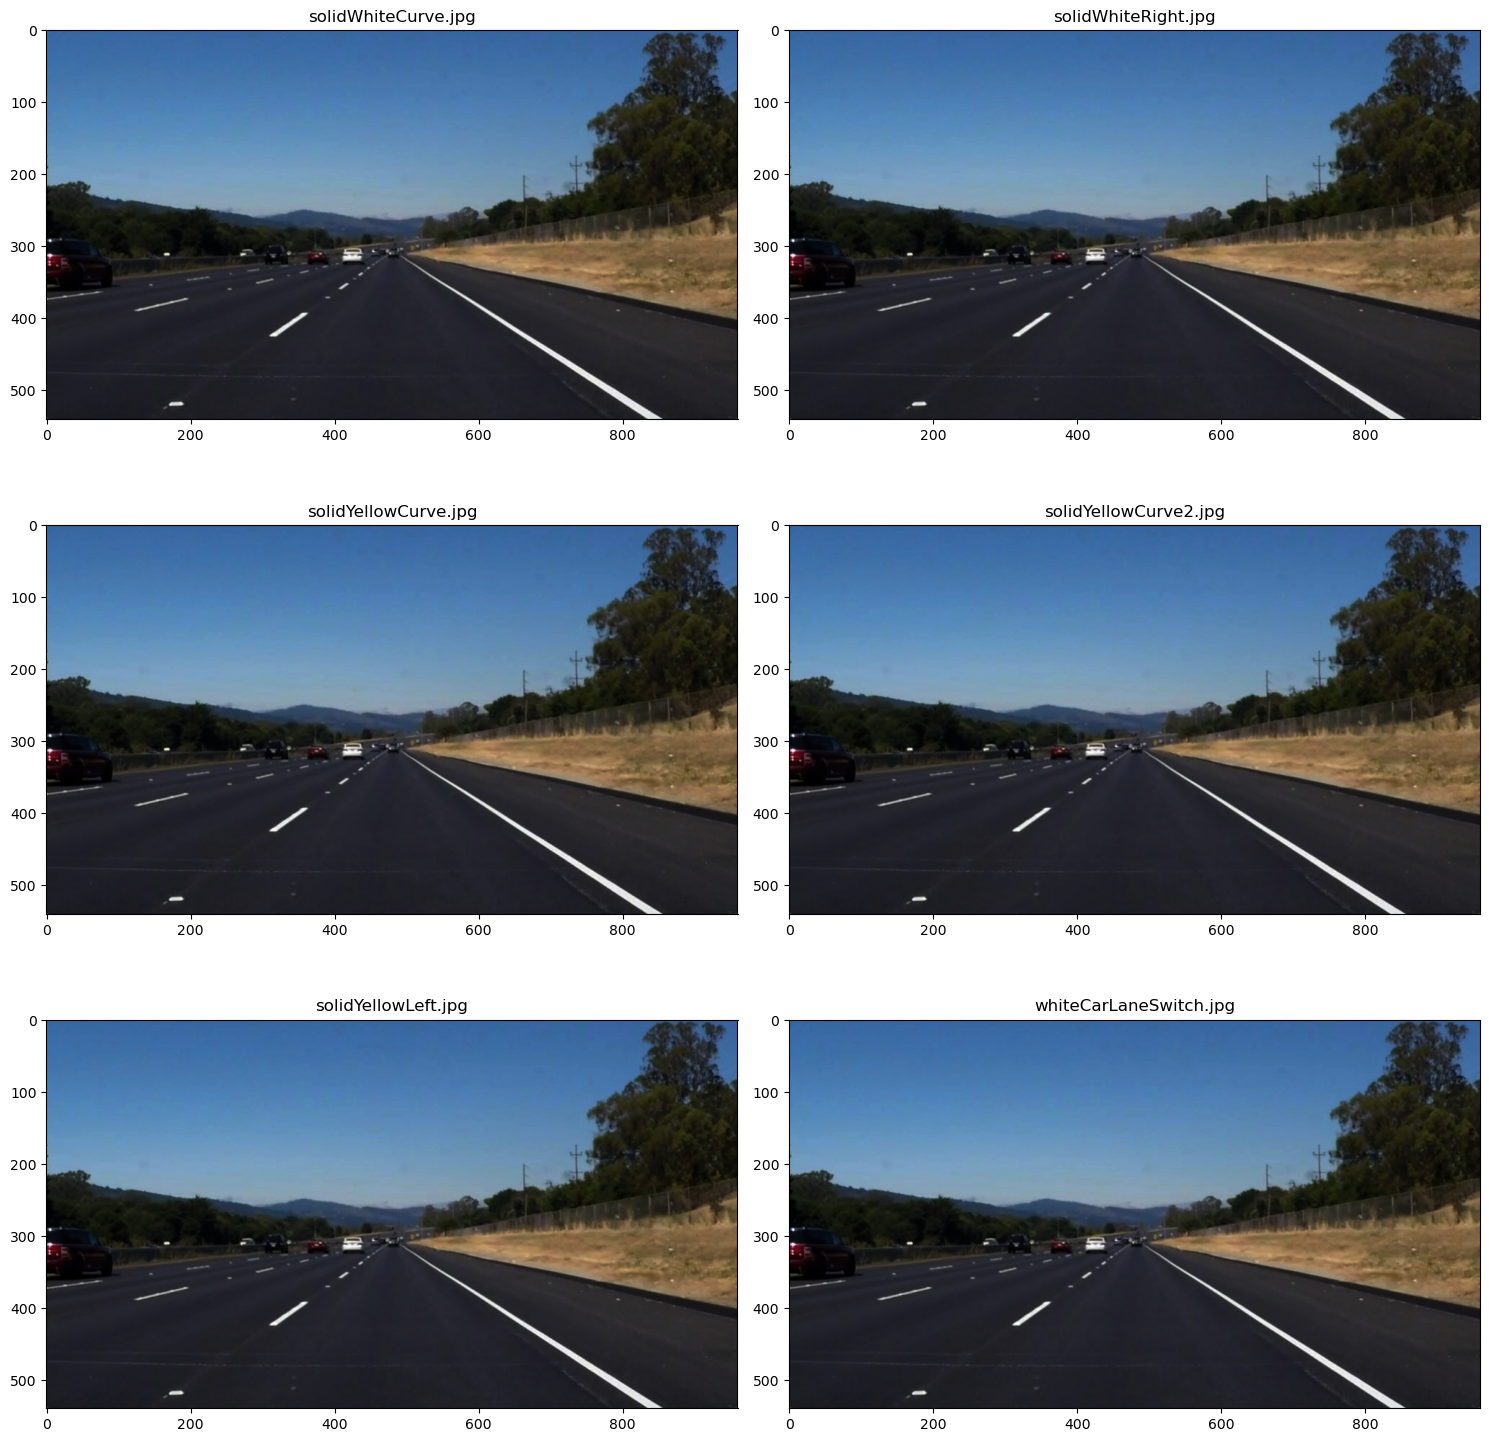

In [12]:
darkned_img= [adjust_Gamma(img, 0.5) for img in gray_img]
display_Imgs(darkned_img, test_imgs)
# save_Image(darkned_img, test_imgs, prefix= "Darkned")

### RGB Color Space- Color Selection

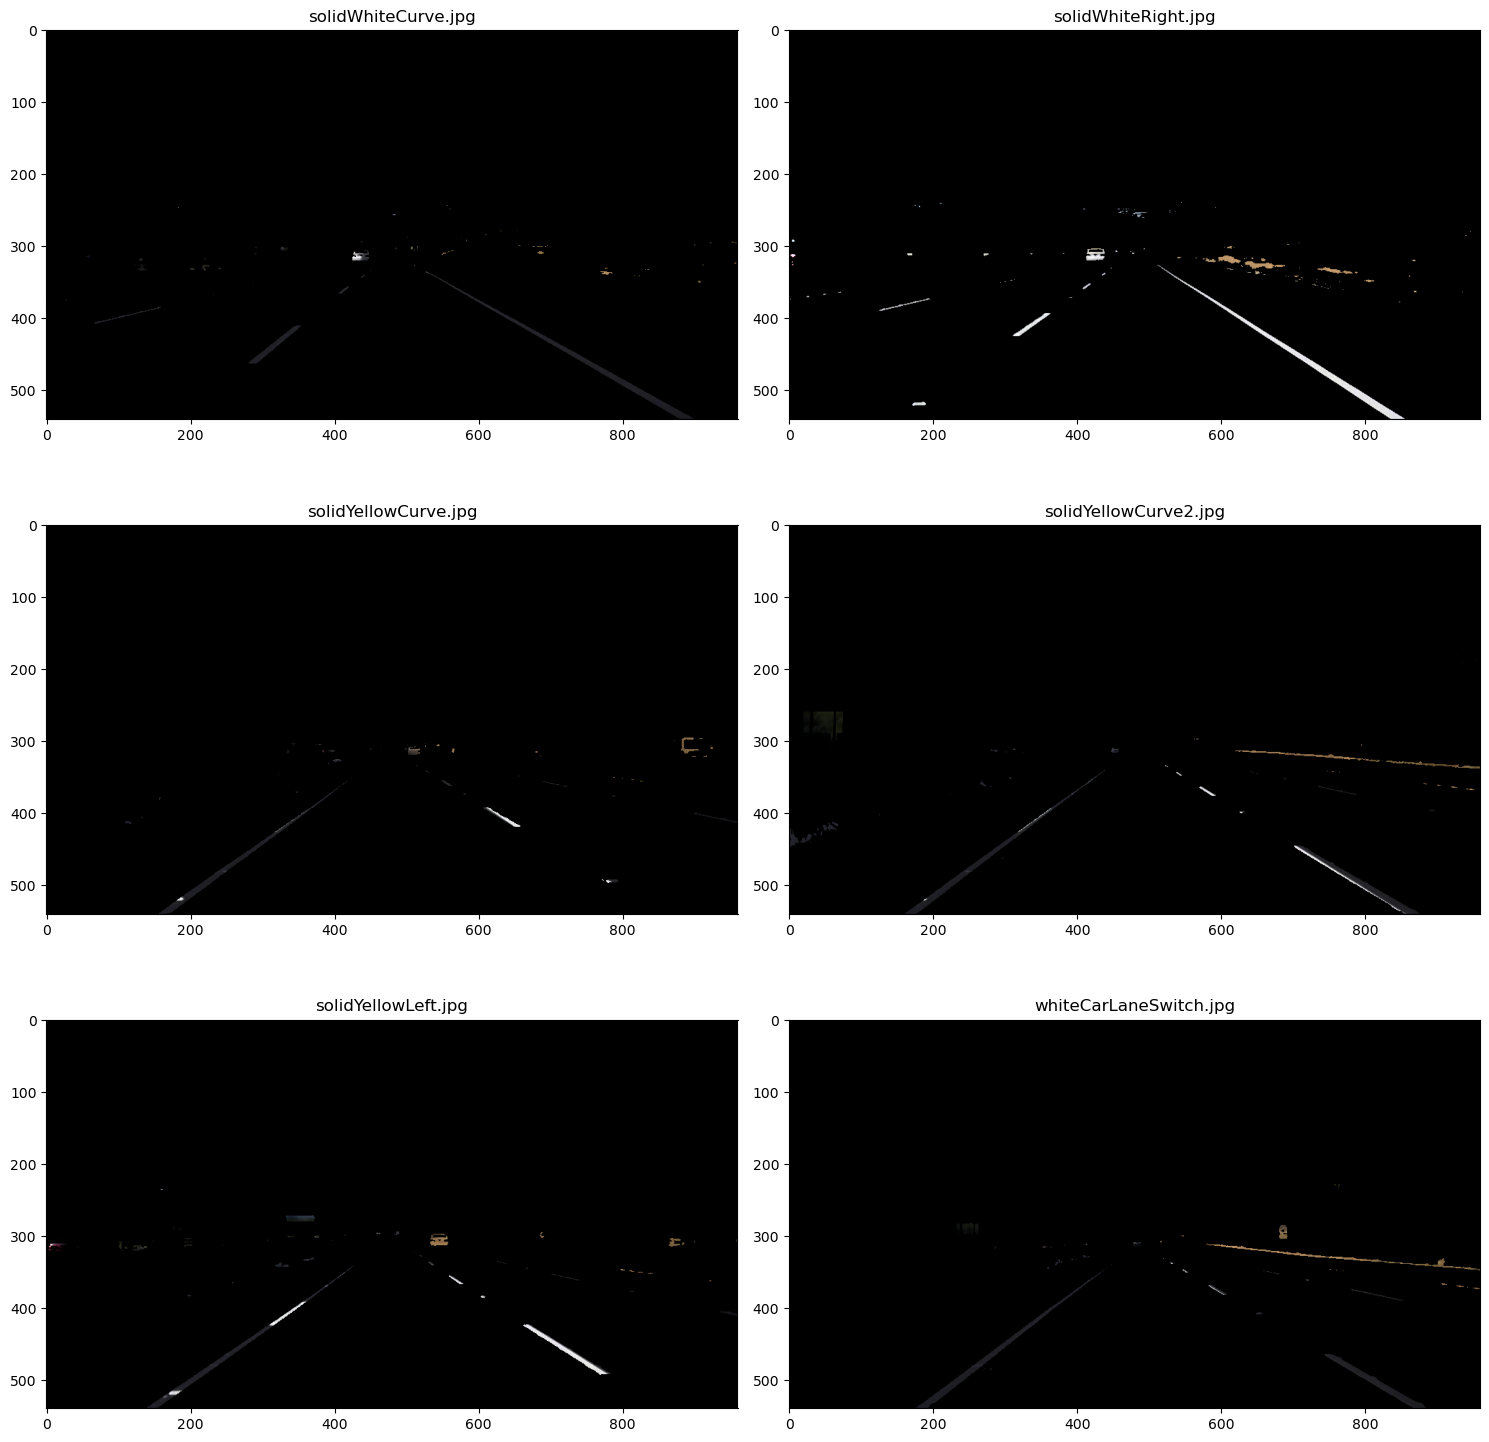

In [13]:
white_masks = [isolated_color_mask(img, np.array([210, 210, 210], dtype=np.uint8), np.array([255, 255, 255], dtype=np.uint8)) for img in img_list]
yellow_masks = [isolated_color_mask(img, np.array([190, 190, 0], dtype=np.uint8), np.array([255, 255, 255], dtype=np.uint8)) for img in img_list]
masked_imgs = []
for i in range(len(img_list)):
    mask = cv2.bitwise_or(white_masks[i], yellow_masks[i])
    masked_imgs.append(cv2.bitwise_and(darkned_img[i], darkned_img[i], mask=mask))

display_Imgs(masked_imgs, test_imgs)

### HLS Color Space- Color Selection

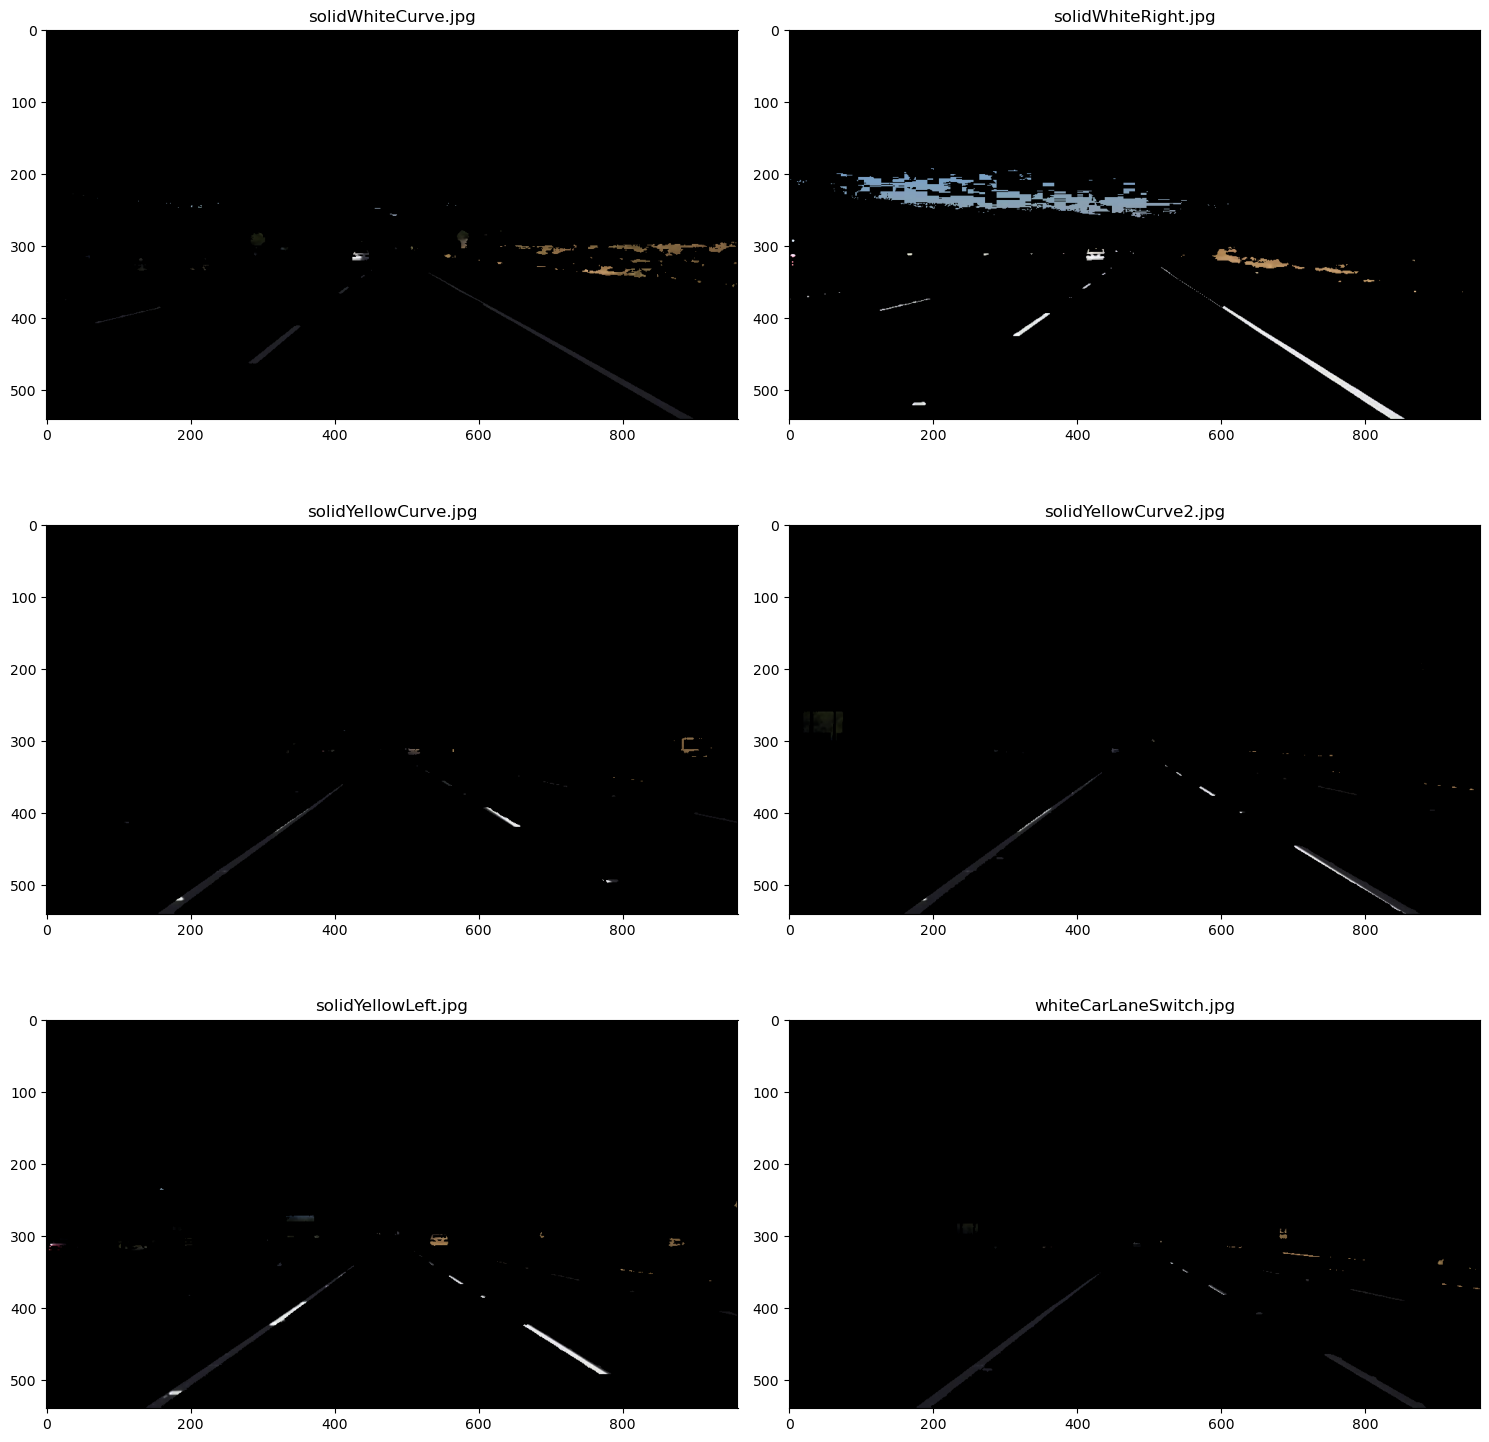

In [80]:
white_masks = []
yellow_masks = []
white_masks = [isolated_color_mask(to_HLS(img), np.array([0, 200, 0], dtype=np.uint8), np.array([200, 255, 255], dtype=np.uint8)) for img in original_img]
yellow_masks = [isolated_color_mask(to_HLS(img), np.array([10, 0, 100], dtype=np.uint8), np.array([40, 255, 255], dtype=np.uint8)) for img in original_img]
masked_imgs = []
for i in range(len(original_img)):
    mask = cv2.bitwise_or(white_masks[i], yellow_masks[i])
    masked_imgs.append(cv2.bitwise_and(darkned_img[i], darkned_img[i], mask=mask))

# plt.imshow(white_masks[0])
display_Imgs(masked_imgs, test_imgs)
save_Image(masked_imgs, test_imgs, prefix='Color_Mask')

### Gaussian Blur

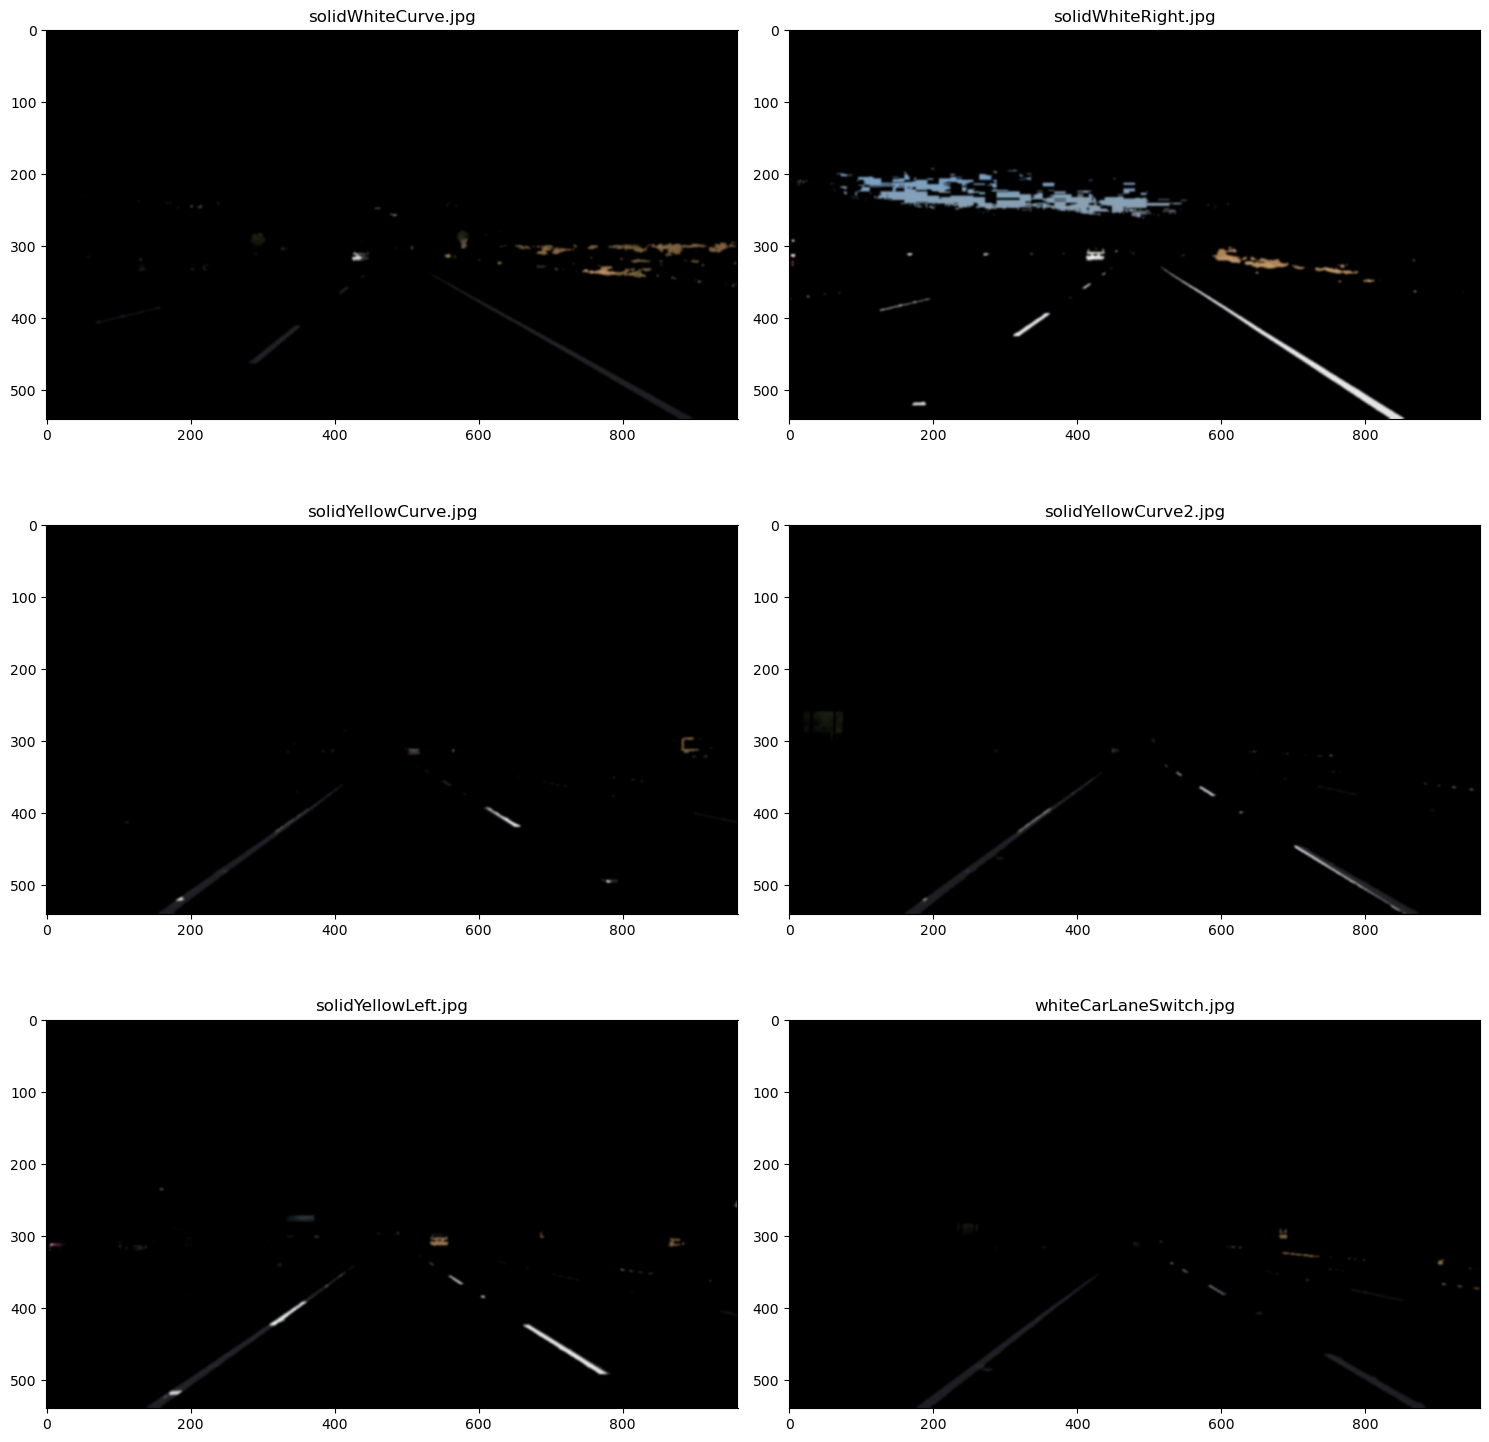

In [15]:
blurred_imgs= [ gaussianBlur(i, kernel_size= 7) for i in masked_imgs]
display_Imgs(blurred_imgs, test_imgs)
save_Image(blurred_imgs, test_imgs, prefix= 'Gaussian')

### Canny Edge Detector

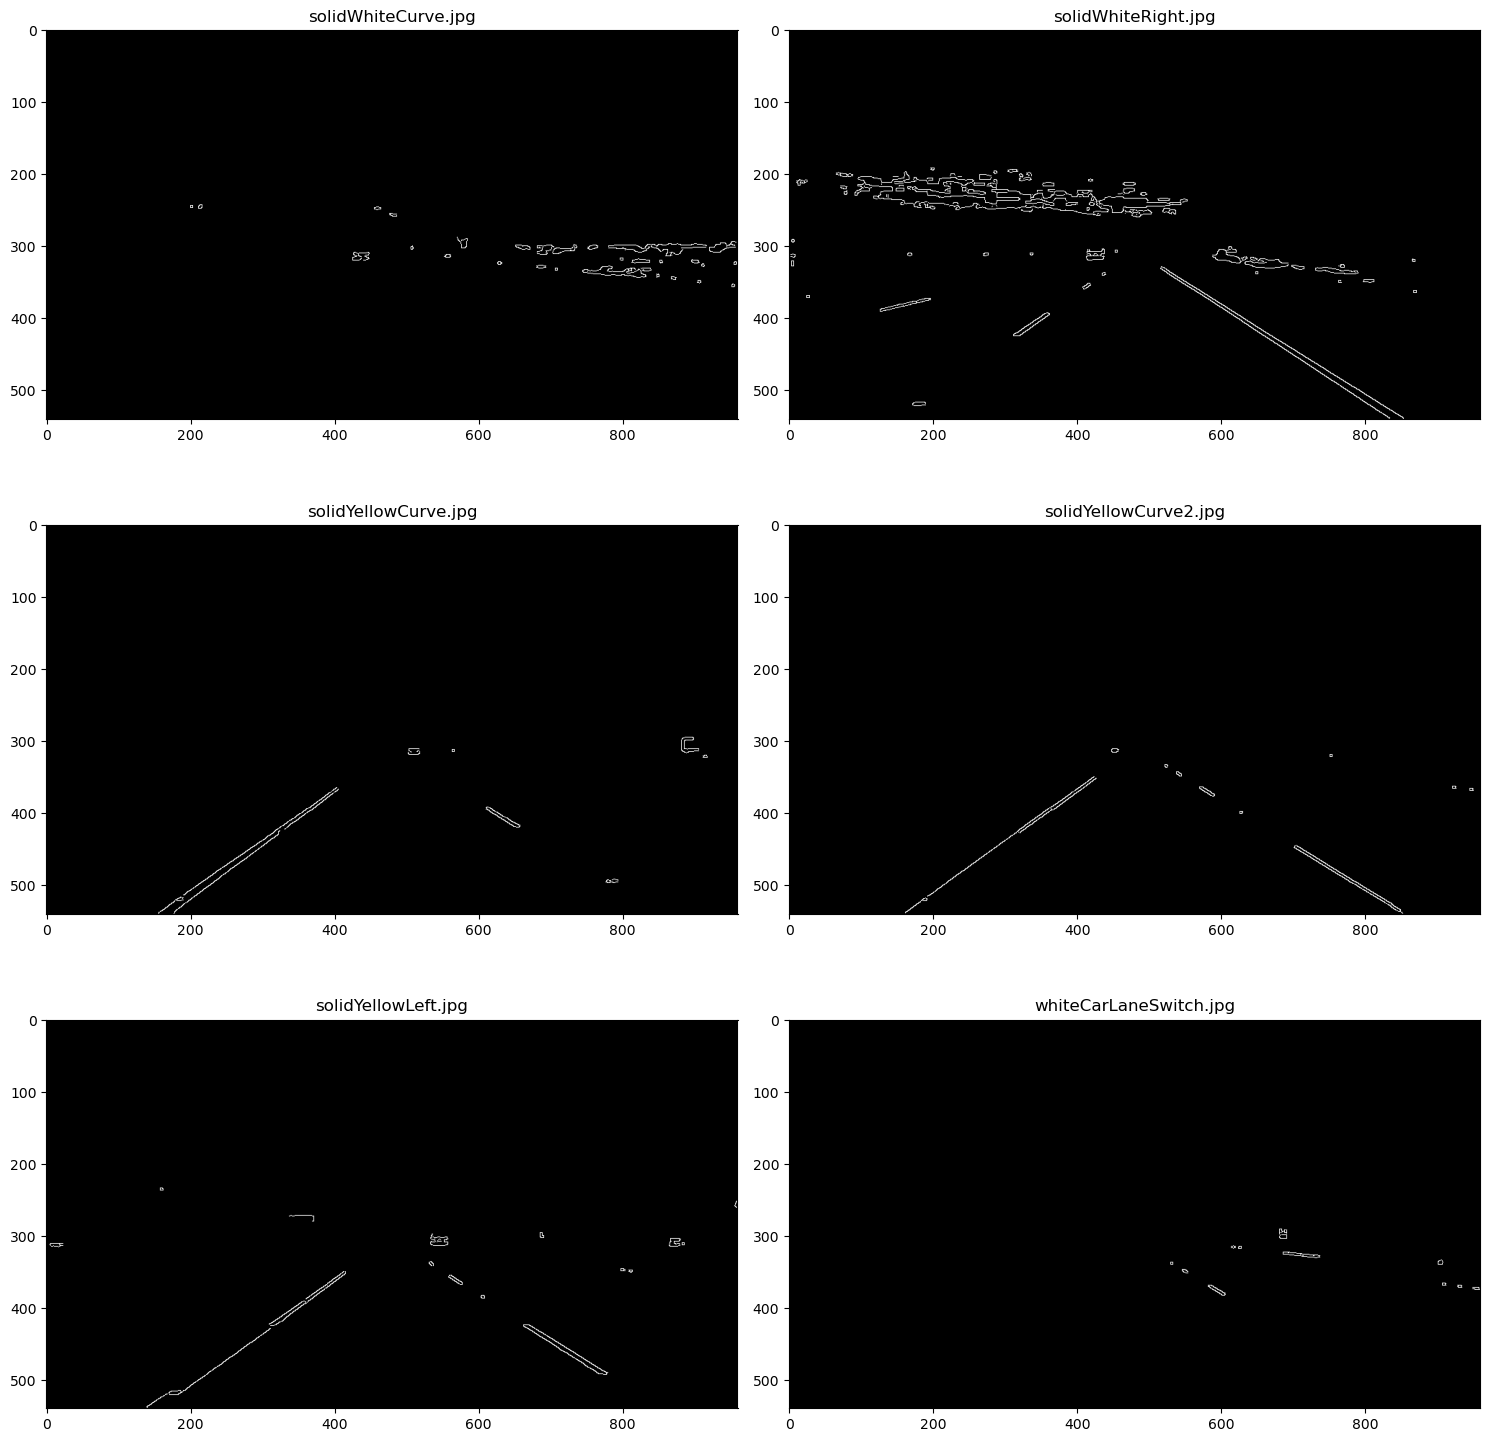

In [16]:
canny_imgs= [canny(i, 70, 140)for i in blurred_imgs]
display_Imgs(canny_imgs, test_imgs)
save_Image(canny_imgs, test_imgs, "Canny")

### Area Of Intrest

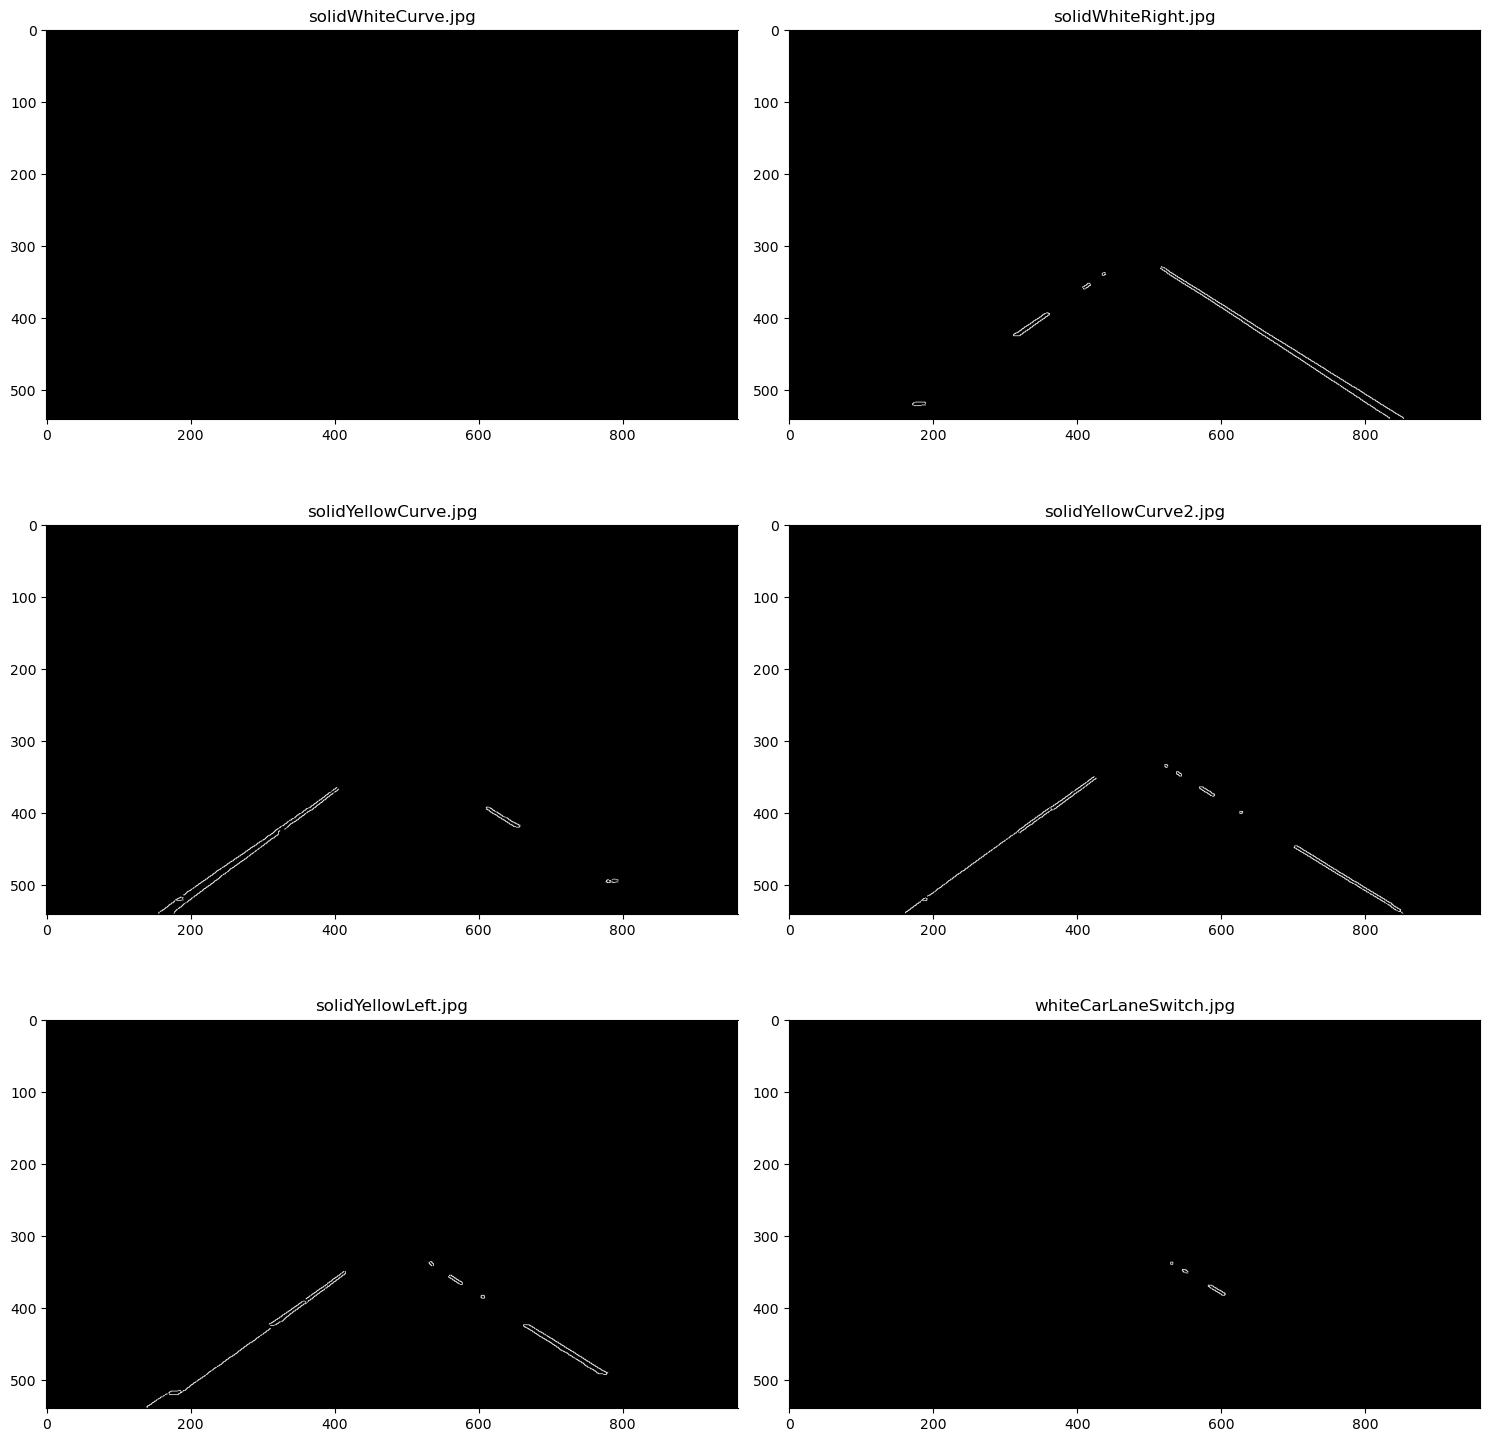

In [17]:
aoi_imgs= []

for img in canny_imgs:
    aoi_imgs.append(get_Aoi(img))
    
display_Imgs(aoi_imgs, test_imgs)
save_Image(aoi_imgs, test_imgs, 'AOI')

### Hough Transform Lane Detection

AssertionError: 

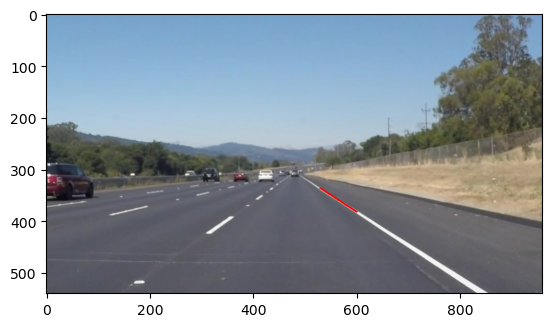

In [84]:
houg_lines_imgs= []
houg_lines_lis= []
for i in aoi_imgs:
#     print(get_Houg_Lines(i))
    houg_lines= cv2.HoughLinesP(i, 1, np.pi/180, 20, np.array([]), minLineLength= 20,maxLineGap= 300)
    
#     print(houg_lines)
    houg_lines_lis.append(houg_lines)
#     print(lines_lis)

# for img, line in zip(original_img, lines_lis):
#     for l in lines:
#         print(l)
#         for x1, y1, x2, y2 in l:
#             print(x1, y1, x2, y2)

for img, points in zip(original_img, houg_lines):
#     print("points:",points)
    x1, y1, x2, y2 = points[0]
    cv2.line(img, (x1, y1), (x2,y2), [255,0,0], 2)

plt.imshow(img)
display_Imgs(img, test_imgs)
save_imgs(hough_lines_imgs, test_imgs, prefix='Hough')

### Averaging and Extrapolating Lines



Averaging is needed for multiple lines that are detected to come up with averaged line.

Extrapolation is needed for poartially recongined lane lines to extrapolate to complete lane line.

The left lane lines should have negative slope and the right lane lines should have positive slope. We'll ignore the verticle line (denominator in slope 0) We'll collect left lines and right lines based on line slope and the intercept based on formula b= y-mx


0.5084745762711864 72.37288135593224
0.647887323943662 -6.380281690140862


AssertionError: 

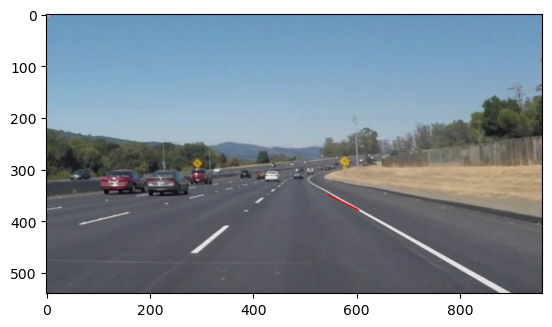

In [83]:
lane_lines_img= []
left_lines = []
right_lines = []
left_lengths = []
right_lengths = []

for img, points in zip(original_img, houg_lines):
    x1, y1, x2, y2 = points[0]

    if x2-x1 == 0:
        slope= math.inf
        intercept= 0
    slope = (y2-y1)/(x2-x1)
    intercept = y1 - slope * x1

    if slope== math.inf:
        continue
#     for x1, y1, x2, y2 in points:
    line_len= np.sqrt((y2-y1)**2 + (x2-x1)**2)
    print(slope, intercept)
    if slope<0:
        left_lines.append((slope, intercept))
        left_lengths.append(line_len)

    else:
        right_lines.append((slope, intercept))
        right_lengths.append(line_len)

    # average
#     print(left_lines, left_lengths)
    left_avg= np.dot(left_lines,left_lengths)/np.sum(left_lengths) if len(left_lengths)>0 else None
    right_avg= np.dot(right_lines[0][0], right_lengths)/np.sum(right_lengths) if len(right_lengths)>0 else None
    
    mask_img = np.zeros_like(img)
#     print(left_avg, right_avg)
    for line in [left_avg, right_avg]:
#         print("li:",line)
        if line is not None:
#             print("lo:",line[0])
            cv2.line(mask_img, [1,0],[1,0], [255, 0, 0], 15) 
#     lane_lines_img.append(draw_weighted_lines(img, [left_avg, right_avg], thickness= 15))
#     weighted_img(mask_img, img, alpha, beta, gamma)
    lane_lines_img.append(cv2.addWeighted(mask_img, 1.0, img, 0.95, 0))

plt.imshow(lane_lines_img[0])
display_Imgs(lane_lines_imgs, test_imgs)
save_Image(lane_lines_imgs, test_imgs, prefix='Extrapolation')